In [ ]:
from Model_architecture import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp '/content/drive/MyDrive/FaceNet David/facenet_keras_weights.h5' /content
drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
class FaceNet:
  def __new__(self,summary=False):
    from model_architecture import InceptionResNetV2
    facenet = InceptionResNetV2()
    facenet.load_weights('/content/facenet_keras_weights.h5')
    if summary:
      print(facenet.summary())
    return facenet

# Next File

In [ ]:
import pickle
import numpy as np
from sklearn.preprocessing import Normalizer
import cv2
import os
import random
from Models.pre_trained_model_setup import *

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!unzip "/content/drive/MyDrive/faces-cropped (2).zip" -d dataset
drive.flush_and_unmount()

KeyboardInterrupt: 

path: test1.webp
name: donald


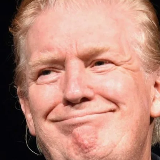

this is image entered!!
1/1 [==============================] - 2s 2s/step
guessed it correct! its  donald
path: test2.jpg
name: dhoni


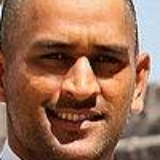

this is image entered!!
1/1 [==============================] - 0s 105ms/step
guessed it correct! its  dhoni
path: test3.jpg
name: aviral


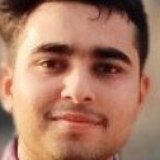

this is image entered!!
1/1 [==============================] - 0s 96ms/step
guessed it correct! its  aviral
path: test4.jpeg
name: shobhita


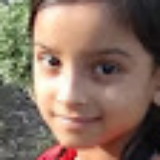

this is image entered!!
1/1 [==============================] - 0s 88ms/step
guessed it correct! its  shobhita
path: test5.jpg
name: shobhita


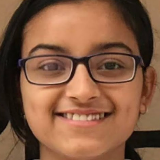

this is image entered!!
1/1 [==============================] - 0s 95ms/step
oops incorrect, I thought its  rashmika
path: test7.jpg
name: musk


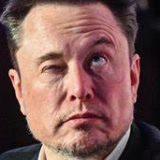

this is image entered!!
1/1 [==============================] - 0s 98ms/step
guessed it correct! its  musk
path: tets9.jpg
name: putin


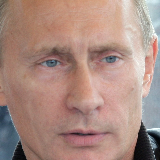

this is image entered!!
1/1 [==============================] - 0s 149ms/step
guessed it correct! its  putin
path: avi.jpg
name: aviral


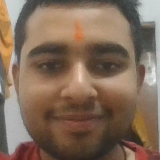

this is image entered!!
1/1 [==============================] - 0s 145ms/step
guessed it correct! its  aviral
path: test11.jpg
name: aishwarya


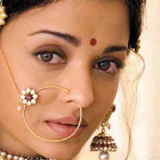

this is image entered!!
1/1 [==============================] - 0s 85ms/step
guessed it correct! its  aishwarya
path: test10.jpg
name: rashmika


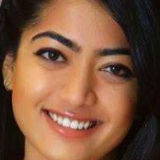

this is image entered!!
1/1 [==============================] - 0s 156ms/step
guessed it correct! its  rashmika
90.0 %


In [ ]:
data = []
l2_normalizer = Normalizer('l2')
detector = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
model = FaceNet()
from google.colab.patches import cv2_imshow

for i in range(10):
  name = input('name: ')
  path = input('path: ')
  image = cv2.imread(path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  (x, y, w, h) = detector.detectMultiScale(gray, 1.3, 5)[0]
  image = image[y:y+h, x:x+w, :]
  img = cv2.resize(image, (160, 160))
  img = np.asarray(img)
  img = img.astype('float32') / 255.0
  img = np.expand_dims(img, axis=0)
  classe = name
  embed = model.predict(img)
  embed = embed[0] #to be figured out tomorrow
  embed = l2_normalizer.transform(np.expand_dims(embed, axis=0))[0]
  data.append((embed,classe))


with open("FaceEmbeds.pkl", "wb") as f:
        pickle.dump(data, f)



with open("FaceEmbeds.pkl", "rb") as f:
  data = pickle.load(f)

class_name_and_arrays = data

correct= 0
incorrect = 0

for i in range(10):
          path = input('path: ')
          classe = input('name: ')
          image = cv2.imread(path)
          gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
          (x, y, w, h) = detector.detectMultiScale(gray, 1.3, 5)[0]
          image = image[y:y+h, x:x+w, :]
          img = cv2.resize(image, (160, 160))
          cv2_imshow(img)
          img = np.asarray(img)
          print('this is image entered!!')
          img = img.astype('float32') / 255.0
          img = np.expand_dims(img, axis=0)
          new_embedding = model.predict(img)
          new_embedding = new_embedding[0]


          highest_similarity = -float('inf')  # Initialize with a negative infinity
          predicted_class_name = None

          for array,class_name in class_name_and_arrays:
            similarity = np.dot(new_embedding, array) / (np.linalg.norm(new_embedding) + np.linalg.norm(array))  # Calculate similarity
            if similarity > highest_similarity:
              highest_similarity = similarity
              predicted_class_name = class_name

          if predicted_class_name == classe:
            correct+=1
            print('guessed it correct! its ',predicted_class_name)
          else:
            incorrect+=1
            print('oops incorrect, I thought its ',predicted_class_name)

accur = (correct/(incorrect+correct))*100
print(accur,"%")



In [ ]:
class Generate_Embed_From_Dataset:

  data = []
  l2_normalizer = Normalizer('l2')
  detector = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  def embedding(self,path):
    model = FaceNet()
    classes = os.listdir(path)
    classes.remove('class_list.txt')


    imageTrainArr = []
    imageTestArr = []
    classesTrain = []
    classesTest = []

    for i in classes:
        path_of_folder = str(path + i)
        count = 0
        for j in range(2):
          dirImg = os.listdir(path_of_folder)
          opts = len(dirImg)
          index1 = random.randint(0,opts-1)
          index2 = random.randint(0,opts-1)
          imageTrainArr.append(path + i + '/' + dirImg[index1])
          imageTestArr.append(path + i + '/' +  dirImg[index2])
          classesTrain.append(i)
          classesTest.append(i)

    for i in range(len(imageTrainArr)-1500):
        image = cv2.imread(imageTrainArr[i])
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        try:
          (x, y, w, h) = self.detector.detectMultiScale(gray, 1.3, 5)[0]
          image = image[y:y+h, x:x+w, :]
        except:
          image = image
        img = cv2.resize(image, (160, 160))
        img = np.asarray(img)
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)
        classe = classesTrain[i]
        embed = model.predict(img)
        embed = embed[0] #to be figured out tomorrow
        embed = self.l2_normalizer.transform(np.expand_dims(embed, axis=0))[0]
        self.data.append((embed,classe))

    return (self.data, imageTestArr, classesTest)




In [ ]:
FaceData_generator = Generate_Embed_From_Dataset()
data, testPaths, classesTest = FaceData_generator.embedding('/content/dataset/faces-cropped/')

with open("FaceEmbeds.pkl", "wb") as f:
        pickle.dump(data, f)

with open("TestPaths.pkl", "wb") as f:
        pickle.dump(testPaths, f)

with open("TestClasses.pkl", "wb") as f:
        pickle.dump(classesTest, f)

1/1 [==============================] - 0s 85ms/step


In [ ]:
class Test:
    correct = 0
    incorrect = 0
    detector = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
    l2_normalizer = Normalizer('l2')

    def test(self,path_embeds, path_test, path_classes):
      model = FaceNet()


      with open(path_embeds, "rb") as f:
        data = pickle.load(f)

      with open(path_test,"rb") as f:
        imageTestArr = pickle.load(f)

      with open(path_classes,"rb") as f:
        classesTest = pickle.load(f)

      class_name_and_arrays = data


      for i in range(len(imageTestArr)-1500):
          image = cv2.imread(imageTestArr[i])
          gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
          try:
            (x, y, w, h) = detector.detectMultiScale(gray, 1.3, 5)[0]
            image = image[y:y+h, x:x+w, :]
          except:
            image = image
          img = cv2.resize(image, (160, 160))
          img = np.asarray(img)
          img = img.astype('float32') / 255.0
          img = np.expand_dims(img, axis=0)
          classe = classesTest[i]
          new_embedding = model.predict(img)
          new_embedding = new_embedding[0]
          new_embedding = self.l2_normalizer.transform(np.expand_dims(new_embedding, axis=0))[0]


          highest_similarity = -float('inf')  # Initialize with a negative infinity
          predicted_class_name = None

          for array,class_name in class_name_and_arrays:
            similarity = np.dot(new_embedding, array) / (np.linalg.norm(new_embedding) + np.linalg.norm(array))  # Calculate similarity
            if similarity > highest_similarity:
              highest_similarity = similarity
              predicted_class_name = class_name

          if predicted_class_name == classe:
            self.correct+=1
          else:
            self.incorrect+=1
      accur = (self.correct/(self.incorrect+self.correct))*100
      return accur



In [ ]:
Tester = Test()
accuracy = Tester.test(path_embeds="FaceEmbeds.pkl",path_test="TestPaths.pkl",path_classes="TestClasses.pkl")

1/1 [==============================] - 0s 94ms/step


In [ ]:
print(accuracy," %")

79.0  %


EXPERMENTATIONs

In [ ]:
data = []

In [ ]:
encodes = []

In [ ]:
import matplotlib.pyplot as plt

paths = ['avi.png','shubhi.png']

model = FaceNet()
detector = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
l2_normalizer = Normalizer('l2')

for i in paths:
  image = cv2.imread(i)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  try:
    (x, y, w, h) = detector.detectMultiScale(gray, 1.3, 5)[0]
    image = image[y:y+h, x:x+w, :]
  except:
    image = image
  img = cv2.resize(image, (160, 160))
  img = np.asarray(img)
  img = img.astype('float32') / 255.0
  img = np.expand_dims(img, axis=0)
  embed = model.predict(img)
  embed = embed[0] #to be figured out tomorrow
  encodes.append(embed)

# if encodes:
#   encode = np.sum(encodes, axis=0 )
#   encode = l2_normalizer.transform(np.expand_dims(encode, axis=0))[0]
#   print(i)
#   print()
#   print(encode)
#   data.append(encode)




1/1 [==============================] - 3s 3s/step
avi.png

[ 5.46870120e-02  2.65633017e-02  1.49063304e-01  6.49505248e-03
  4.68493290e-02  3.85029009e-03  4.45002504e-03 -8.48464593e-02
  2.01314017e-01 -5.03790751e-02 -1.54744536e-01  8.53477046e-03
 -9.44209695e-02 -3.32380533e-02 -5.63112311e-02  8.11966956e-02
  1.01203613e-01  1.00908177e-02  7.19920872e-03 -1.09439760e-01
 -2.95858039e-03  3.77232470e-02  1.89202502e-01  6.15663789e-02
 -5.87296337e-02 -1.12129152e-01  2.55510658e-02 -8.92059356e-02
  3.96553278e-02 -2.74167601e-02 -2.02297062e-01 -1.11352175e-01
 -1.56457081e-01  9.28737074e-02  9.40333754e-02  4.59106937e-02
 -7.86947161e-02  1.29103390e-02  5.47490083e-02  3.78840195e-05
 -8.83044228e-02 -1.13930531e-01 -8.46332461e-02  2.15527043e-02
 -4.82258871e-02  1.16133653e-01 -6.11396879e-02 -1.10781886e-01
 -1.81928992e-01  1.03413738e-01 -5.04902638e-02 -1.01833664e-01
 -5.33852875e-02  1.14959531e-01  1.64305735e-02 -4.75845449e-02
 -4.69489358e-02 -1.51583105e-0

In [ ]:
data[3]

array([ 0.09273424, -0.00686054,  0.12459821,  0.03555366,  0.02946828,
        0.09967254,  0.05461555, -0.07980844,  0.2126153 ,  0.01880507,
       -0.15309757, -0.07339064, -0.04713891,  0.04041184, -0.05690426,
        0.06796702,  0.05273014, -0.01460737,  0.0524046 , -0.03944064,
       -0.07850727,  0.12417819,  0.1773607 ,  0.00586435, -0.04978043,
        0.03998294,  0.22143704, -0.05085894,  0.02061796,  0.06960494,
       -0.20086522, -0.06264853, -0.08105572,  0.03072941,  0.08752839,
        0.00103872,  0.04335772,  0.02287281, -0.00257578,  0.02780132,
       -0.17927094, -0.15826294, -0.05378262,  0.07008135, -0.00410794,
        0.01469989, -0.12163657, -0.10789733,  0.01088584,  0.11529078,
        0.02447763, -0.08002295, -0.02602638,  0.04481277,  0.03458972,
       -0.00960858, -0.01680143, -0.03415443, -0.09473155, -0.0266149 ,
       -0.16803908,  0.01237631,  0.10590305, -0.06548674, -0.10120162,
        0.22412795, -0.04607434,  0.11330027, -0.04259894,  0.05

In [ ]:
model = FaceNet()
detector = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
l2_normalizer = Normalizer('l2')


image = cv2.imread('shubhi.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
try:
  (x, y, w, h) = detector.detectMultiScale(gray, 1.3, 5)[0]
  image = image[y:y+h, x:x+w, :]
except:
  image = image
img = cv2.resize(image, (160, 160))
img = np.asarray(img)
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)
embed = model.predict(img)
embed = embed[0] #to be fi
encode = l2_normalizer.transform(np.expand_dims(embed, axis=0))[0]
encode

1/1 [==============================] - 3s 3s/step


array([ 0.06681572, -0.03309463,  0.02025696,  0.03892637, -0.00587308,
        0.12233314,  0.06488006, -0.02275396,  0.08335617,  0.07008281,
       -0.05102307, -0.10053299,  0.02730948,  0.0816047 , -0.02007299,
        0.01115643, -0.02648652, -0.02772798,  0.05955944,  0.05084443,
       -0.09642408,  0.1221274 ,  0.04997299, -0.04921743, -0.00885222,
        0.15362021,  0.2561484 ,  0.01781519, -0.01043355,  0.11311812,
       -0.06761312,  0.02329456,  0.04153207, -0.04660964,  0.02405399,
       -0.04091289,  0.12713207,  0.01701177, -0.05360626,  0.03507484,
       -0.14518267, -0.09508345,  0.00991739,  0.06868193,  0.03916615,
       -0.08824545, -0.09738123, -0.03437366,  0.18106993,  0.05048729,
        0.07734881, -0.00740152,  0.01623098, -0.04913669,  0.02857121,
        0.03162966,  0.02196139,  0.09628006,  0.06530043, -0.01230461,
       -0.13376552,  0.14663549,  0.07966628,  0.00499567, -0.09678673,
        0.12896612, -0.04253812,  0.05090331, -0.04534071,  0.08

In [ ]:
ssr = 0
for i in range(128):
  ssr = ssr+(data[1][i]-data[2][i])**2
ssr

0.0